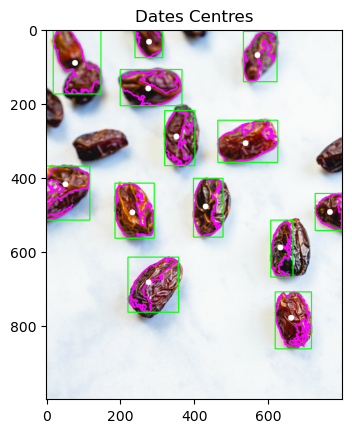

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# --- CHALLENGE 1 - DATES & MANDARINS --- #

FILE_NAME = 'dates_2.jpg'

img_ori = cv.imread(FILE_NAME)
img_rgb = cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_ori, cv.COLOR_BGR2HSV)

# Number of objects to find
num_obj = 13

# Brown Dates HSV threshold values
lower_blue = np.array([0, 61, 23]) 
upper_blue = np.array([17, 255, 186])

"""
# Orange HSV threshold values
lower_blue = np.array([10, 65, 27]) 
upper_blue = np.array([20, 255, 137])
"""

# Masks for blue
mask_blue = cv.inRange(img_hsv,lower_blue,upper_blue)

# Canny edge detection and find contours for each colour
canny_blue = cv.Canny(mask_blue, 100, 200)

_, contours_blue, _ = cv.findContours(mask_blue, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_blue = sorted(contours_blue, key=cv.contourArea, reverse=True)

pool_centre = img_rgb
cv.drawContours(pool_centre, contours_blue[0:num_obj], -1, (243,10,245), 3)

# Find centre of pool
num_centre = 0
centres = np.zeros((num_obj, 2), dtype="float32")

for cs in contours_blue[0:num_obj]:
    M = cv.moments(cs)
    centre_X = int(M["m10"] / M["m00"])
    centre_Y = int(M["m01"] / M["m00"])
    
    # draw center of the shape on the image
    cv.circle(pool_centre, (centre_X, centre_Y), 8, (255, 255, 255), -1)
    cs_pnt = [centre_X, centre_Y]
    centres[num_centre] = cs_pnt
    num_centre+=1
    
    # get the bounding rect
    x, y, w, h = cv.boundingRect(cs)
    # draw a green rectangle to visualize the bounding rect
    cv.rectangle(pool_centre, (x, y), (x+w, y+h), (0, 255, 0), 2)

# --- SHOW POOL CENTRE IMAGE --- #
plt.imshow(pool_centre)
plt.title('Dates Centres')
plt.show()

[386. 110.]


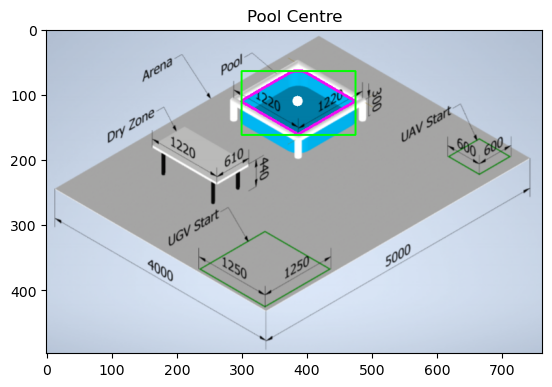

In [2]:
# --- CHALLENGE 2A - POOL CENTRE --- #

FILE_NAME = 'pool_try2.png'

img_ori = cv.imread(FILE_NAME)
img_rgb = cv.cvtColor(img_ori, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img_ori, cv.COLOR_BGR2HSV)

# Blue HSV threshold values
lower_blue = np.array([84, 32, 47])
upper_blue = np.array([106, 255, 255])

# Masks for blue
mask_blue = cv.inRange(img_hsv,lower_blue,upper_blue)

# Canny edge detection and find contours for each colour
canny_blue = cv.Canny(mask_blue, 100, 200)

_, contours_blue, _ = cv.findContours(mask_blue, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_blue = sorted(contours_blue, key=cv.contourArea, reverse=True)

pool_centre = img_rgb
cv.drawContours(pool_centre, contours_blue[0:1], -1, (243,10,245), 3)

# Find centre of pool
num_centre = 0
for cs in contours_blue[0:1]:
    M = cv.moments(cs)
    centre_X = int(M["m10"] / M["m00"])
    centre_Y = int(M["m01"] / M["m00"])
    
    # draw center of the shape on the image
    cv.circle(pool_centre, (centre_X, centre_Y), 8, (255, 255, 255), -1)
    cs_pnt = [centre_X, centre_Y]
    centres[num_centre] = cs_pnt
    num_centre+=1
    
print(centres[0])

# get the bounding rect
x, y, w, h = cv.boundingRect(contours_blue[0])
# draw a green rectangle to visualize the bounding rect
cv.rectangle(pool_centre, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
# --- SHOW POOL CENTRE IMAGE --- #
plt.imshow(pool_centre)
plt.title('Pool Centre')
plt.show()